# 資料準備

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# 建立共用函數

In [2]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),
                       name ='W')

In [3]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape)
                       , name = 'b')

In [4]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], 
                        padding='SAME')

In [5]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], 
                          padding='SAME')

# 輸入層 Input Layer

In [6]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float",shape=[None, 784]
                       ,name="x")    
    x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolutional Layer 1

In [7]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=conv2d(x_image, W1)+ b1
    C1_Conv = tf.nn.relu(Conv1 )

In [8]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

# Convolutional Layer 2

In [9]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)

In [10]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 

# Fully Connected Layer

In [11]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [12]:
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(
                  tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, 
                                keep_prob=0.8)

# 輸出層Output

In [13]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(
                 tf.matmul(D_Hidden_Dropout,
                           W4)+b4)

# 設定訓練模型最佳化步驟

In [14]:
with tf.name_scope("optimizer"):
    
    y_label = tf.placeholder("float", shape=[None, 10], 
                              name="y_label")
    
    loss_function = tf.reduce_mean(
                      tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001) \
                    .minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# 設定評估模型

In [15]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 訓練模型

In [16]:
trainEpochs = 30
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
for epoch in range(trainEpochs):

    
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)         

Train Epoch: 01 Loss= 1.636133194  Accuracy= 0.8504
Train Epoch: 02 Loss= 1.543625593  Accuracy= 0.9304
Train Epoch: 03 Loss= 1.525657177  Accuracy= 0.9418
Train Epoch: 04 Loss= 1.513388276  Accuracy= 0.953
Train Epoch: 05 Loss= 1.503730297  Accuracy= 0.9638
Train Epoch: 06 Loss= 1.498731256  Accuracy= 0.967
Train Epoch: 07 Loss= 1.494642496  Accuracy= 0.9698
Train Epoch: 08 Loss= 1.492656112  Accuracy= 0.9718
Train Epoch: 09 Loss= 1.489811540  Accuracy= 0.974
Train Epoch: 10 Loss= 1.488841176  Accuracy= 0.9754
Train Epoch: 11 Loss= 1.486127853  Accuracy= 0.9784
Train Epoch: 12 Loss= 1.485402584  Accuracy= 0.9776
Train Epoch: 13 Loss= 1.484933615  Accuracy= 0.9786
Train Epoch: 14 Loss= 1.483963966  Accuracy= 0.9798
Train Epoch: 15 Loss= 1.483983040  Accuracy= 0.9786
Train Epoch: 16 Loss= 1.481891751  Accuracy= 0.981
Train Epoch: 17 Loss= 1.480499983  Accuracy= 0.9822
Train Epoch: 18 Loss= 1.480249763  Accuracy= 0.9822
Train Epoch: 19 Loss= 1.479416013  Accuracy= 0.9826
Train Epoch: 20 

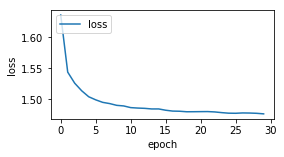

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

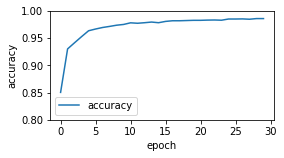

In [19]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


# 評估模型準確率

In [20]:
len(mnist.test.images)

10000

In [21]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images,
                                   y_label: mnist.test.labels}))

Accuracy: 0.9848


In [22]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[:5000],
                                   y_label: mnist.test.labels[:5000]}))


Accuracy: 0.9806


In [23]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[5000:],
                                   y_label: mnist.test.labels[5000:]}))

Accuracy: 0.992


# 預測機率

In [24]:
y_predict=sess.run(y_predict, 
                   feed_dict={x: mnist.test.images[:5000]})

In [25]:
y_predict[:5]

array([[3.18064449e-18, 1.26454836e-14, 3.71076029e-16, 4.06737984e-13,
        3.03008295e-21, 3.30586007e-17, 2.81531835e-24, 1.00000000e+00,
        1.01270176e-17, 2.91315409e-12],
       [1.68046935e-12, 6.58642520e-13, 1.00000000e+00, 2.18429513e-20,
        4.34886987e-25, 3.22850169e-26, 1.63411363e-22, 2.27366846e-25,
        2.22150061e-16, 8.85249065e-29],
       [4.02289757e-08, 9.99998689e-01, 1.95710648e-08, 3.27756138e-12,
        3.77802934e-07, 9.35841057e-11, 6.18453511e-09, 9.32225408e-09,
        8.98653354e-07, 3.44963924e-09],
       [1.00000000e+00, 5.85110085e-12, 1.49073365e-09, 2.40036658e-12,
        6.40117256e-12, 9.21241972e-11, 2.19131802e-09, 3.01524983e-09,
        1.01097414e-14, 5.26394217e-09],
       [6.45193043e-16, 6.99897443e-13, 1.83150465e-13, 4.57716091e-17,
        1.00000000e+00, 2.67669876e-16, 1.40113377e-12, 4.59421086e-12,
        2.48152600e-13, 4.82915707e-09]], dtype=float32)

# 預測結果

In [26]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images ,
                                      y_label: mnist.test.labels})

In [27]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [28]:
import numpy as np
def show_images_labels_predict(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 10):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[i],(28, 28)), 
                  cmap='binary')
        ax.set_title("label=" +str(np.argmax(labels[i]))+
                     ",predict="+str(prediction_result[i])
                     ,fontsize=9) 
    plt.show()

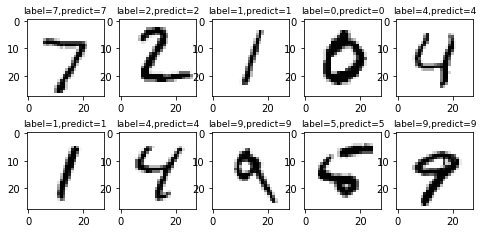

In [29]:
show_images_labels_predict(mnist.test.images,mnist.test.labels,prediction_result)

# 找出預測錯誤

In [30]:
for i in range(500):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=18   label= 3 predict= 8
i=247   label= 4 predict= 2
i=320   label= 9 predict= 8
i=321   label= 2 predict= 7
i=449   label= 3 predict= 5


In [31]:
def show_images_labels_predict_error(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    i=0;j=0
    while i<10:
        if prediction_result[j]!=np.argmax(labels[j]):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(np.reshape(images[j],(28, 28)), 
                      cmap='binary')
            ax.set_title("j="+str(j)+
                         ",l=" +str(np.argmax(labels[j]))+
                         ",p="+str(prediction_result[j])
                         ,fontsize=9) 
            i=i+1  
        j=j+1
    plt.show()

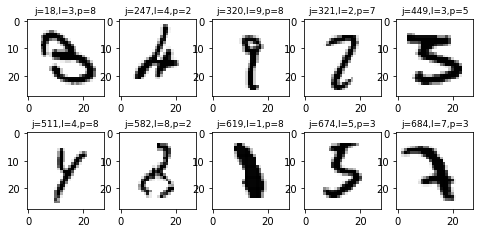

In [32]:
show_images_labels_predict_error(mnist.test.images,mnist.test.labels,prediction_result)

In [33]:
saver = tf.train.Saver()

In [34]:
save_path = saver.save(sess, "saveModel/CNN_model1")

In [35]:
print("Model saved in file: %s" % save_path)

Model saved in file: saveModel/CNN_model1


In [36]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN',sess.graph)

In [37]:
#sess.close()